In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import tensorflow as tf

In [5]:
x_data = np.linspace(0,10.0,1000000)

In [6]:
noise = np.random.randn(len(x_data))

In [7]:
x_data

array([  0.00000000e+00,   1.00000100e-05,   2.00000200e-05, ...,
         9.99998000e+00,   9.99999000e+00,   1.00000000e+01])

In [8]:
x_data.shape


(1000000,)

y = mx + b

b = 5

In [9]:
y_true = (0.5 * x_data) + 5 + noise

In [10]:
x_df = pd.DataFrame(data=x_data,columns=['X DATA'])

In [11]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [13]:
x_df.head()


,X DATA
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [14]:
y_df.head()

,Y
0,5.005947
1,6.142705
2,5.411756
3,4.126695
4,5.412845


In [15]:
my_data = pd.concat([x_df,y_df],axis=1)

In [17]:
my_data.head()

,X DATA,Y
0,0.00000,5.005947
1,0.00001,6.142705
2,0.00002,5.411756
3,0.00003,4.126695
4,0.00004,5.412845


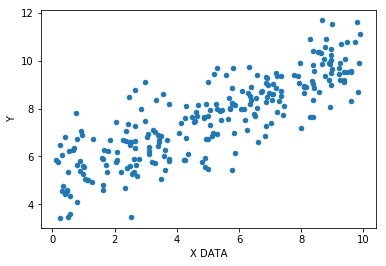

In [19]:
my_data.sample(n=250).plot(kind='scatter', x='X DATA',y='Y')

In [20]:
batch_size=8

In [21]:
m = tf.Variable(0.81)#is the slope
b = tf.Variable(0.17)

In [22]:
xph = tf.placeholder(tf.float32,[batch_size])#feed dictionary

In [23]:
yph = tf.placeholder(tf.float32,[batch_size])

In [24]:
y_model = m*xph+b#prediction

In [26]:
error = tf.reduce_sum(tf.square(yph-y_model))#actual value - predicted value

In [27]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [28]:
init = tf.global_variables_initializer()

In [30]:
with tf.Session() as sess:
    sess.run(init)
    
    batches=1000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
        model_m , model_b =sess.run([m,b])

In [31]:
model_m

0.51687622

In [32]:
model_b

4.8896098

In [33]:
y_hat=x_data*model_m + model_b

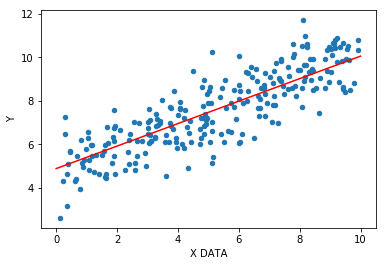

In [35]:
my_data.sample(n=250).plot(kind='scatter',x='X DATA',y='Y')
plt.plot(x_data,y_hat,'r')

#tf estimator

In [103]:
feat_cols = [tf.feature_column.numeric_column('X',shape=[1])]

In [104]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_model_dir': 'C:\\Users\\HP\\AppData\\Local\\Temp\\tmp5fn7sc2n', '_keep_checkpoint_max': 5}


In [105]:
from sklearn.model_selection import train_test_split

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [107]:
print(x_train.shape)

(700000,)


In [108]:
x_test.shape

(300000,)

In [109]:
input_func = tf.estimator.inputs.numpy_input_fn({'X':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [110]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'X':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [111]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'X':x_test},y_test
                                                     ,batch_size=8,num_epochs=1000,shuffle=False)

In [112]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\HP\AppData\Local\Temp\tmp5fn7sc2n\model.ckpt.
INFO:tensorflow:step = 1, loss = 425.554
INFO:tensorflow:global_step/sec: 1070.54
INFO:tensorflow:step = 101, loss = 30.8286 (0.094 sec)
INFO:tensorflow:global_step/sec: 1300.61
INFO:tensorflow:step = 201, loss = 23.5002 (0.078 sec)
INFO:tensorflow:global_step/sec: 1319.32
INFO:tensorflow:step = 301, loss = 15.9556 (0.076 sec)
INFO:tensorflow:global_step/sec: 1302.13
INFO:tensorflow:step = 401, loss = 12.9504 (0.076 sec)
INFO:tensorflow:global_step/sec: 1222.8
INFO:tensorflow:step = 501, loss = 8.69283 (0.082 sec)
INFO:tensorflow:global_step/sec: 1284.91
INFO:tensorflow:step = 601, loss = 9.63042 (0.079 sec)
INFO:tensorflow:global_step/sec: 1355.59
INFO:tensorflow:step = 701, loss = 25.0129 (0.074 sec)
INFO:tensorflow:global_step/sec: 1392.6
INFO:tensorflow:step = 801, loss = 15.5392 (0.071 sec)
INFO:tensorflow:global_step/sec: 1285.49
INFO:te

In [114]:

train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2019-02-26-16:04:55
INFO:tensorflow:Restoring parameters from C:\Users\HP\AppData\Local\Temp\tmp5fn7sc2n\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/1000

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorflow:Evaluation [889/1000]
INFO:tensorf

In [115]:
eval_metric = estimator.evaluate(input_fn=test_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2019-02-26-16:07:13
INFO:tensorflow:Restoring parameters from C:\Users\HP\AppData\Local\Temp\tmp5fn7sc2n\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/1000

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorf

In [116]:
print('TRAING DATA')
print(train_metrics)

TRAING DATA
{'global_step': 1000, 'loss': 8.6532221, 'average_loss': 1.0816528}


In [117]:
print('TESTING DATA')
print(eval_metric)

TESTING DATA
{'global_step': 1000, 'loss': 8.80369, 'average_loss': 1.1004612}


In [118]:
brand_new_data = np.linspace(0,10,10)

In [119]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'X':brand_new_data},shuffle=False)

In [120]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from C:\Users\HP\AppData\Local\Temp\tmp5fn7sc2n\model.ckpt-1000


[{'predictions': array([ 4.43966103], dtype=float32)},
 {'predictions': array([ 5.10054064], dtype=float32)},
 {'predictions': array([ 5.76142073], dtype=float32)},
 {'predictions': array([ 6.42230034], dtype=float32)},
 {'predictions': array([ 7.08318043], dtype=float32)},
 {'predictions': array([ 7.74405956], dtype=float32)},
 {'predictions': array([ 8.40493965], dtype=float32)},
 {'predictions': array([ 9.06581879], dtype=float32)},
 {'predictions': array([ 9.72669983], dtype=float32)},
 {'predictions': array([ 10.38757896], dtype=float32)}]

In [126]:
predictions = []# np.array([])
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Restoring parameters from C:\Users\HP\AppData\Local\Temp\tmp5fn7sc2n\model.ckpt-1000


In [127]:
predictions

[array([ 4.43966103], dtype=float32),
 array([ 5.10054064], dtype=float32),
 array([ 5.76142073], dtype=float32),
 array([ 6.42230034], dtype=float32),
 array([ 7.08318043], dtype=float32),
 array([ 7.74405956], dtype=float32),
 array([ 8.40493965], dtype=float32),
 array([ 9.06581879], dtype=float32),
 array([ 9.72669983], dtype=float32),
 array([ 10.38757896], dtype=float32)]

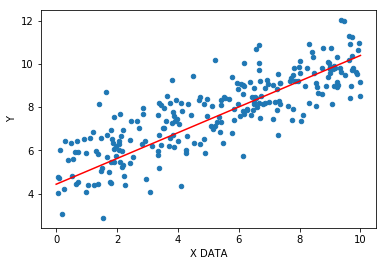

In [130]:
my_data.sample(n=250).plot(kind='scatter',x='X DATA',y='Y')
plt.plot(brand_new_data,predictions,'r')